In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
%matplotlib inline
import seaborn as sb

In [2]:
# Step 2: Load Dataset
df = pd.read_csv('Sales_Data.csv', encoding='unicode_escape')
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11257 entries, 0 to 11256
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11245 non-null  float64
 1   Cust_name         11245 non-null  object 
 2   Product_ID        11245 non-null  object 
 3   Age               11245 non-null  float64
 4   Age Group         11245 non-null  object 
 5   Gender            11245 non-null  object 
 6   State             11245 non-null  object 
 7   Zone              11245 non-null  object 
 8   Zipcode           0 non-null      float64
 9   Profession        11245 non-null  object 
 10  Product_Category  11245 non-null  object 
 11  Orders            11245 non-null  float64
 12  Amount            11245 non-null  float64
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [3]:
# Step 3: Data Cleaning
# Remove unnecessary columns
df.drop(['Zipcode'], axis=1, inplace=True)

# Drop rows where all values are null
df.dropna(how='all', inplace=True)

# Standardize Gender column
df['Gender'] = df['Gender'].replace({'M':'Male', 'F':'Female'})

df.shape
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Age                 0
Age Group           0
Gender              0
State               0
Zone                0
Profession          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [4]:
# Step 4: Summary Statistics
df.describe()
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11245.000000,11245.000000,11245.000000
mean,35.415651,3.500311,9461.934237
std,12.756369,1.713706,5234.426634
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,4.000000,8109.000000
75%,43.000000,5.000000,12683.000000
max,92.000000,6.000000,29350.000000


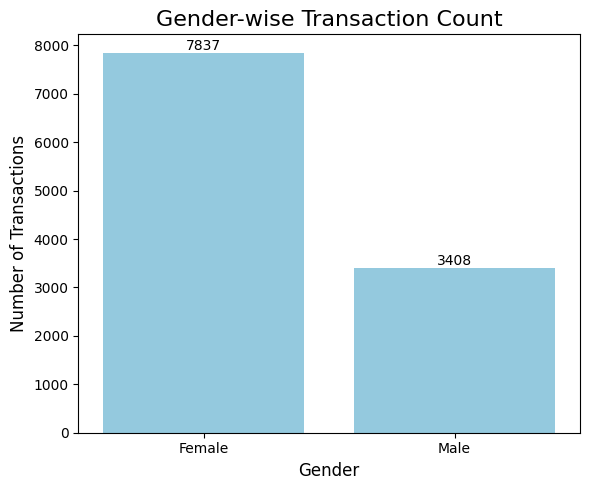

In [5]:
# Step 5: Gender-wise Transaction Count (Bar Chart)
mp.figure(figsize=(6,5))
ax = sb.countplot(x='Gender', data=df, color='skyblue')
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_title('Gender-wise Transaction Count', fontsize=16)
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Number of Transactions', fontsize=12)
mp.tight_layout()
mp.show()

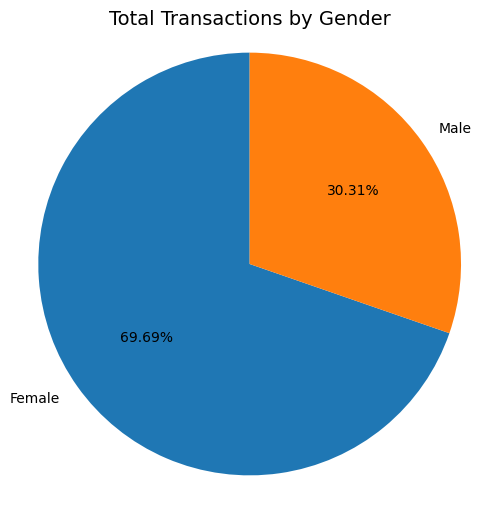

In [6]:
# Step 6: Gender-wise Transaction Distribution (Pie Chart)
gender_counts = df['Gender'].value_counts()
mp.figure(figsize=(6,6))
mp.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.2f%%',
    startangle=90
)
mp.title('Total Transactions by Gender', fontsize=14)
mp.axis('equal')
mp.show()

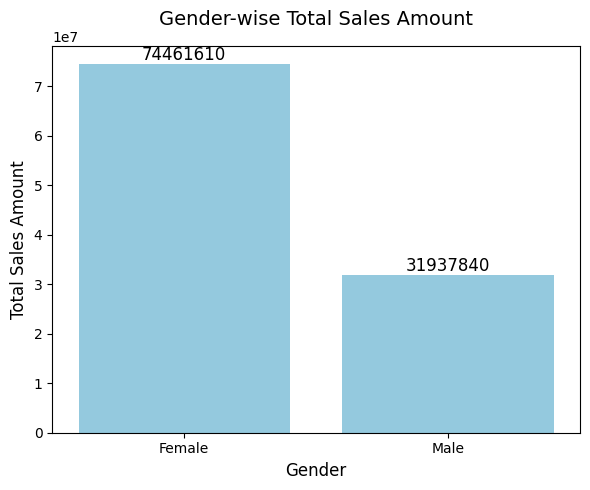

In [7]:
# Step 7: Gender-wise Total Sales Amount
gen_wise_sales = df.groupby('Gender', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
mp.figure(figsize=(6,5))
ax = sb.barplot(x='Gender', y='Amount', data=gen_wise_sales, color='skyblue')
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.0f', fontsize=12, color='black')
ax.set_title('Gender-wise Total Sales Amount', fontsize=14, pad=15)
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Total Sales Amount', fontsize=12)
mp.tight_layout()
mp.show()

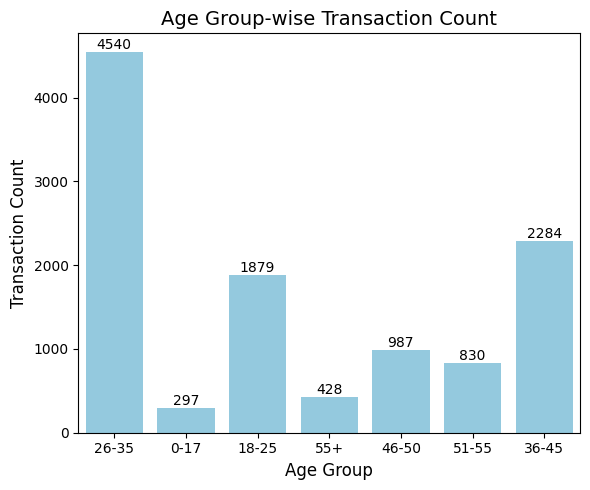

In [8]:
# Step 8: Age Group-wise Transaction Count
mp.figure(figsize=(6,5))
ax = sb.countplot(data=df, x='Age Group', color='skyblue')
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_title('Age Group-wise Transaction Count', fontsize=14)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Transaction Count', fontsize=12)
mp.tight_layout()
mp.show()

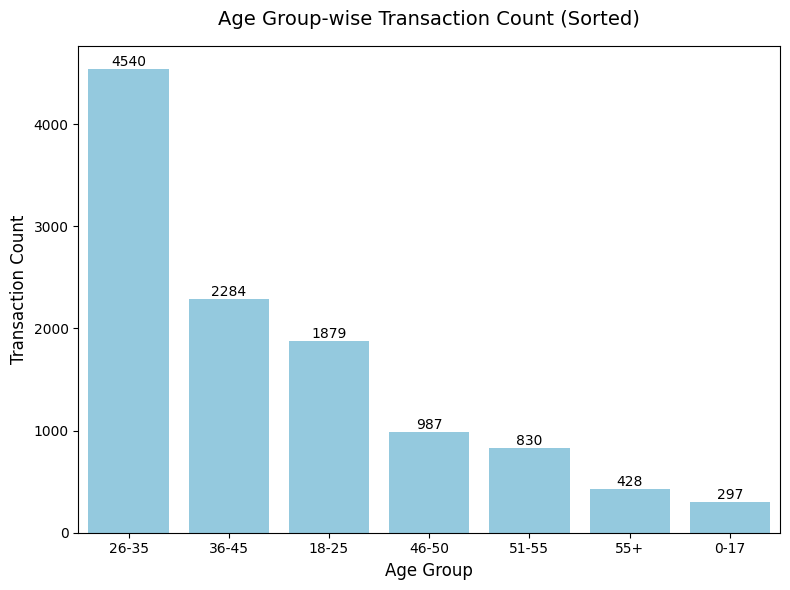

In [9]:
# Step 9: Age Group-wise Transaction Count (Sorted)
age_group_counts = df['Age Group'].value_counts().sort_values(ascending=False)
sns_order = age_group_counts.index
mp.figure(figsize=(8,6))
ax = sb.countplot(data=df, x='Age Group', order=sns_order, color='skyblue')
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_title('Age Group-wise Transaction Count (Sorted)', fontsize=14, pad=15)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Transaction Count', fontsize=12)
mp.tight_layout()
mp.show()

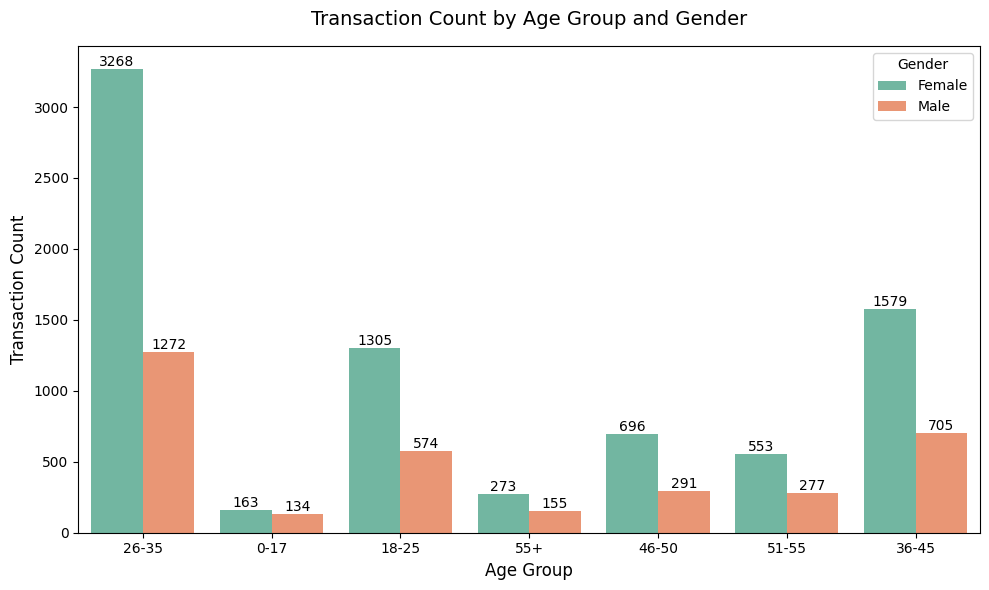

In [10]:
# Step 10: Age Group & Gender-wise Transaction Count
mp.figure(figsize=(10,6))
ax = sb.countplot(data=df, x='Age Group', hue='Gender', palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', fontsize=10, color='black')
ax.set_title('Transaction Count by Age Group and Gender', fontsize=14, pad=15)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Transaction Count', fontsize=12)
mp.tight_layout()
mp.show()

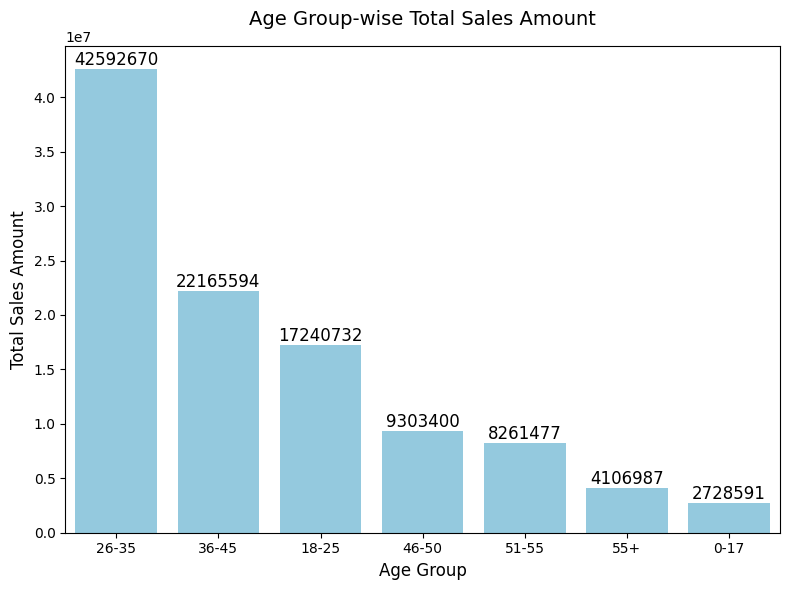

In [11]:
# Step 11: Age Group-wise Total Sales Amount
sales_age = df.groupby('Age Group', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
mp.figure(figsize=(8,6))
ax = sb.barplot(x='Age Group', y='Amount', data=sales_age, color='skyblue')
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.0f', fontsize=12, color='black')
ax.set_title('Age Group-wise Total Sales Amount', fontsize=14, pad=15)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Total Sales Amount', fontsize=12)
mp.tight_layout()
mp.show()

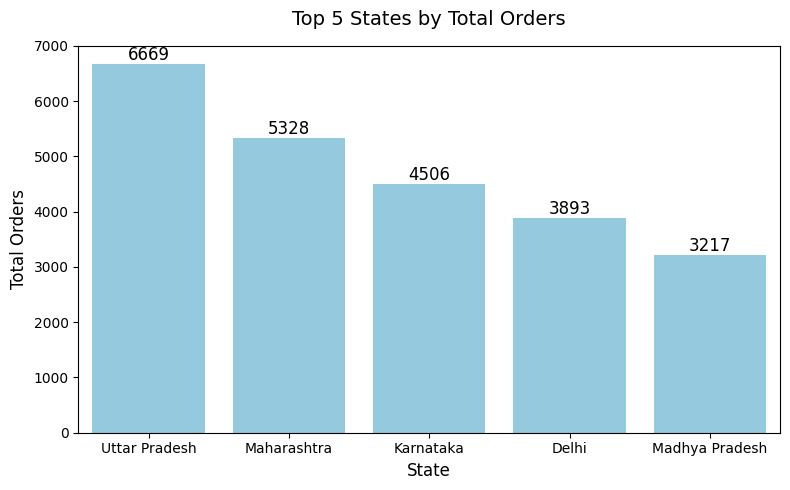

In [12]:
# Step 12: Top 5 States by Orders
top_states = df.groupby('State', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)
mp.figure(figsize=(8,5))
ax = sb.barplot(x='State', y='Orders', data=top_states, color='skyblue')
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', fontsize=12, color='black')
ax.set_title('Top 5 States by Total Orders', fontsize=14, pad=15)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Total Orders', fontsize=12)
mp.tight_layout()
mp.show()

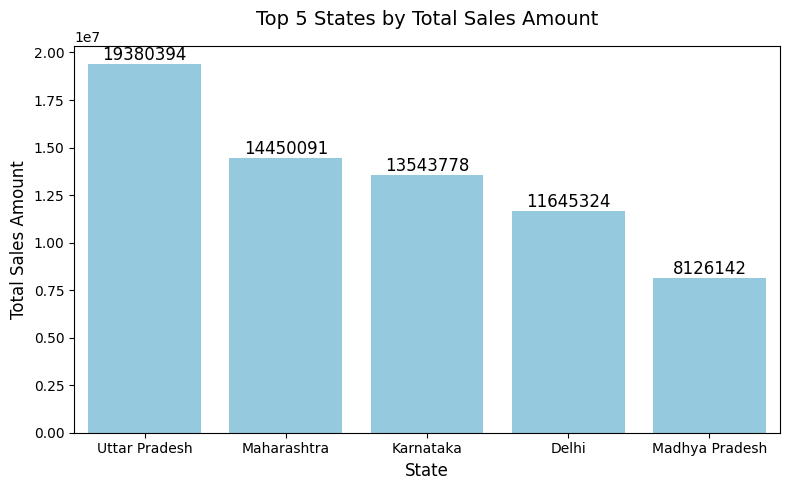

In [13]:
# Step 13: Top 5 States by Total Sales Amount
sales_state = df.groupby('State', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
mp.figure(figsize=(8,5))
ax = sb.barplot(x='State', y='Amount', data=sales_state, color='skyblue')
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.0f', fontsize=12, color='black')
ax.set_title('Top 5 States by Total Sales Amount', fontsize=14, pad=15)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Total Sales Amount', fontsize=12)
mp.tight_layout()
mp.show()

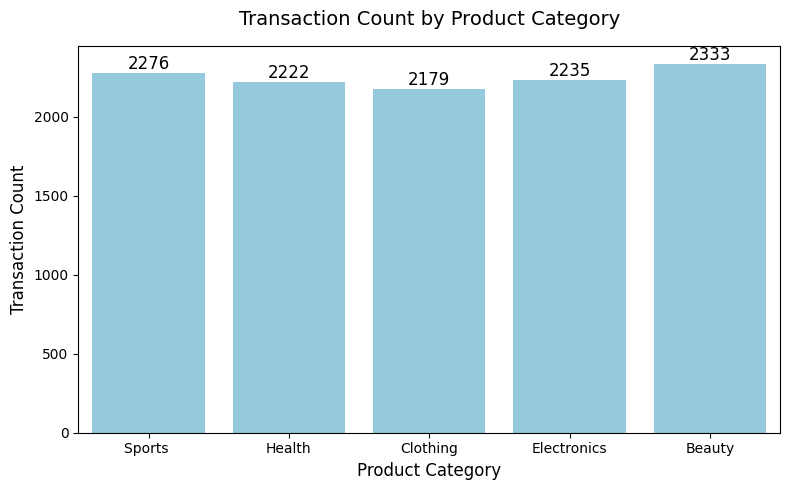

In [14]:
# Step 14: Product Category-wise Transaction Count
mp.figure(figsize=(8,5))
ax = sb.countplot(data=df, x='Product_Category', color='skyblue')
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', fontsize=12, color='black')
ax.set_title('Transaction Count by Product Category', fontsize=14, pad=15)
ax.set_xlabel('Product Category', fontsize=12)
ax.set_ylabel('Transaction Count', fontsize=12)
mp.tight_layout()
mp.show()

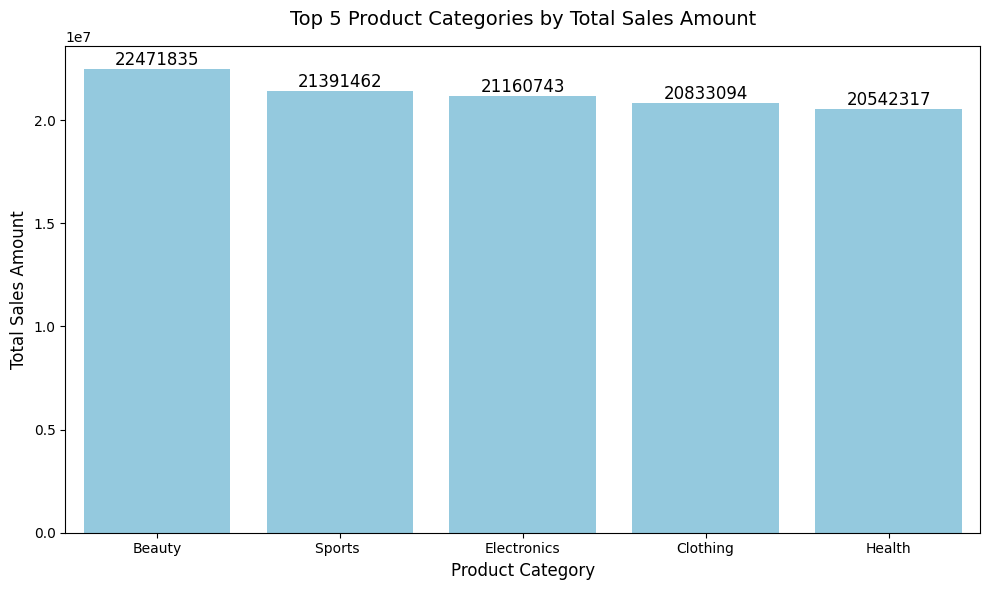

In [15]:
# Step 15: Top 5 Product Categories by Total Sales Amount
sales_product = df.groupby('Product_Category', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
mp.figure(figsize=(10,6))
ax = sb.barplot(data=sales_product, x='Product_Category', y='Amount', color='skyblue')
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.0f', fontsize=12, color='black')
ax.set_title('Top 5 Product Categories by Total Sales Amount', fontsize=14, pad=15)
ax.set_xlabel('Product Category', fontsize=12)
ax.set_ylabel('Total Sales Amount', fontsize=12)
mp.tight_layout()
mp.show()

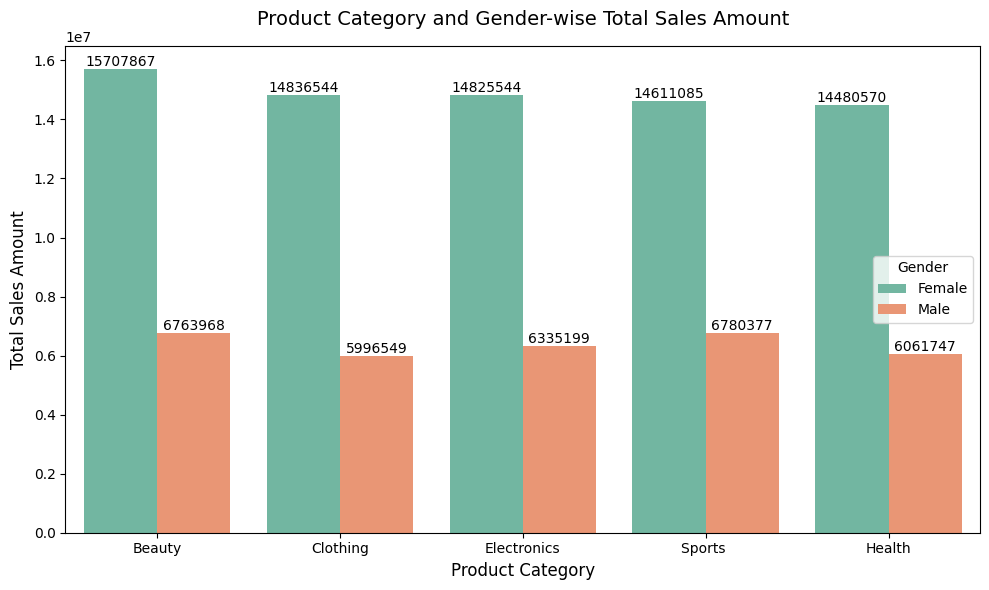

In [16]:
# Step 16: Product Category & Gender-wise Total Sales
sales_pro = df.groupby(['Product_Category', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
mp.figure(figsize=(10,6))
ax = sb.barplot(data=sales_pro, x='Product_Category', y='Amount', hue='Gender', palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=10, color='black')
ax.set_title('Product Category and Gender-wise Total Sales Amount', fontsize=14, pad=15)
ax.set_xlabel('Product Category', fontsize=12)
ax.set_ylabel('Total Sales Amount', fontsize=12)
mp.tight_layout()
mp.show()

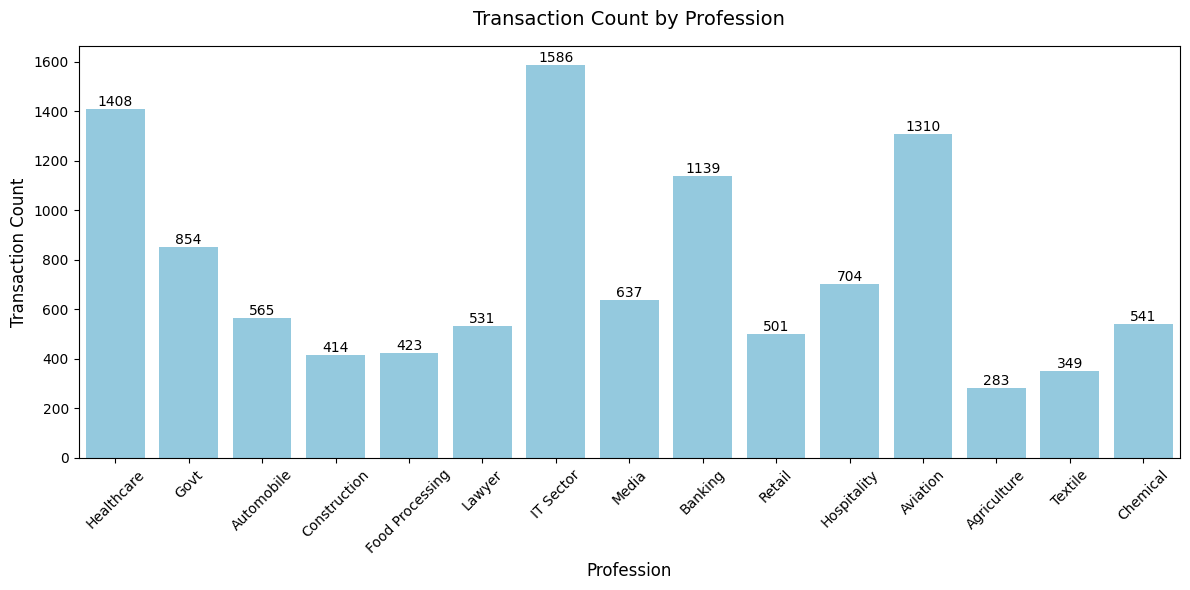

In [17]:
# Step 17: Profession-wise Transaction Count
mp.figure(figsize=(12,6))
ax = sb.countplot(data=df, x='Profession', color='skyblue')
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', fontsize=10, color='black')
ax.set_title('Transaction Count by Profession', fontsize=14, pad=15)
ax.set_xlabel('Profession', fontsize=12)
ax.set_ylabel('Transaction Count', fontsize=12)
ax.tick_params(axis='x', rotation=45)
mp.tight_layout()
mp.show()

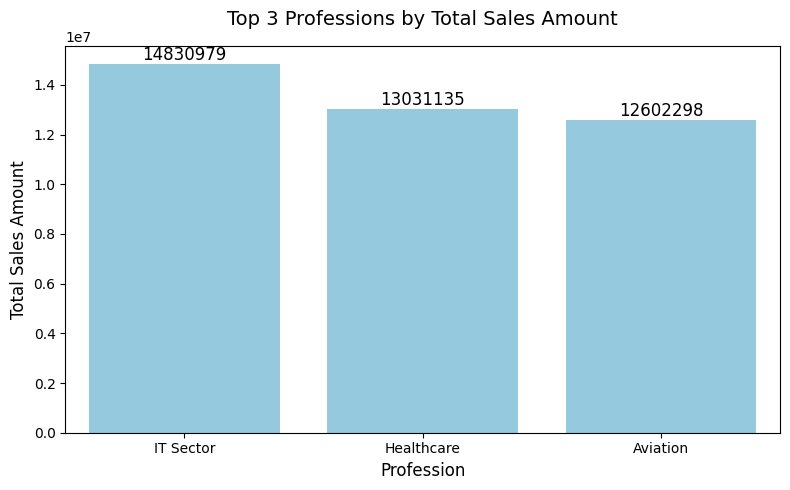

In [18]:
# Step 18: Top 3 Professions by Total Sales Amount
top_professions = df.groupby('Profession', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(3)
mp.figure(figsize=(8,5))
ax = sb.barplot(data=top_professions, x='Profession', y='Amount', color='skyblue')
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.0f', fontsize=12, color='black')
ax.set_title('Top 3 Professions by Total Sales Amount', fontsize=14, pad=15)
ax.set_xlabel('Profession', fontsize=12)
ax.set_ylabel('Total Sales Amount', fontsize=12)
mp.tight_layout()
mp.show()

## Conclusion

### Key Insight
- Females aged 26-35 from Uttar Pradesh, Maharashtra, and Karnataka, working in IT, Healthcare, and Aviation, are more likely to purchase products from the Beauty, Sports, and Electronics categories.